<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/Pytorch/blob/main/pytorch_Autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


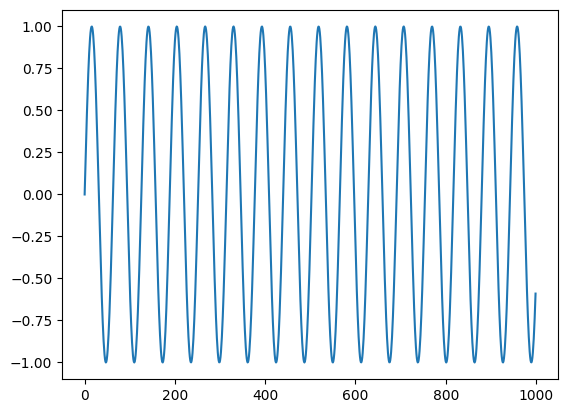

In [2]:
# make the original data
N = 1000
series =np.sin(0.1*np.arange(N))

# plot it
plt.plot(series)
plt.show()

In [3]:
# build the dataset
T = 10
X= []
Y=[]
for t in range(len(series)-T):
  x =series[t:t+T]
  X.append(x)
  y =series[t+T]
  Y.append(y)


X =np.array(X).reshape(-1, T)
Y =np.array(Y).reshape(-1, 1)
N =len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (990, 10) Y.shape (990, 1)


In [4]:
# try auto regressive model
model =nn.Linear(T, 1)


In [5]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.1)


In [6]:
# make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[:-N//2].astype(np.float32))
y_test = torch.from_numpy(Y[:-N//2].astype(np.float32))

In [7]:
# training
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test, epochs =100):


  #stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()

    # forward pass
    outputs =model(X_train)
    loss = criterion(outputs , y_train)

    # backward and optimize
    loss.backward()
    optimizer.step()

    train_losses[it] = loss.item()

    # test loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if(it + 1)% 5 ==0:
      print(f'epoch: {it+1}/ {epochs}, train loss:{loss.item():.4f},  test loss:{test_loss.item():.4f}')

  return train_losses, test_losses



In [8]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

epoch: 5/ 100, train loss:0.0575,  test loss:0.0540
epoch: 10/ 100, train loss:0.0025,  test loss:0.0126
epoch: 15/ 100, train loss:0.0151,  test loss:0.0157
epoch: 20/ 100, train loss:0.0132,  test loss:0.0096
epoch: 25/ 100, train loss:0.0075,  test loss:0.0017
epoch: 30/ 100, train loss:0.0040,  test loss:0.0014
epoch: 35/ 100, train loss:0.0030,  test loss:0.0015
epoch: 40/ 100, train loss:0.0021,  test loss:0.0011
epoch: 45/ 100, train loss:0.0004,  test loss:0.0005
epoch: 50/ 100, train loss:0.0002,  test loss:0.0007
epoch: 55/ 100, train loss:0.0004,  test loss:0.0008
epoch: 60/ 100, train loss:0.0003,  test loss:0.0005
epoch: 65/ 100, train loss:0.0003,  test loss:0.0002
epoch: 70/ 100, train loss:0.0002,  test loss:0.0001
epoch: 75/ 100, train loss:0.0000,  test loss:0.0000
epoch: 80/ 100, train loss:0.0000,  test loss:0.0001
epoch: 85/ 100, train loss:0.0000,  test loss:0.0000
epoch: 90/ 100, train loss:0.0000,  test loss:0.0000
epoch: 95/ 100, train loss:0.0000,  test loss:0

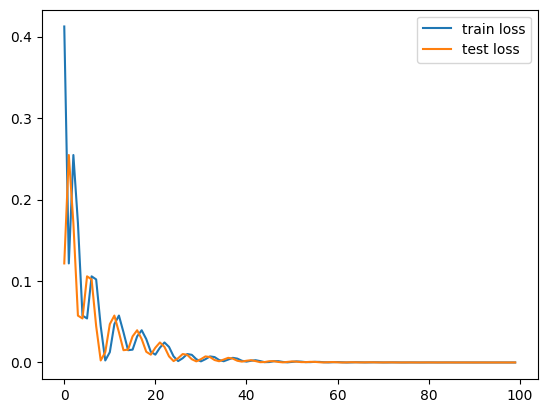

In [9]:
# plotting
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()


In [10]:
# wrong forecast using true target

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = 0

while len(validation_predictions)< len(validation_target):
  input_ = X_test[i].view(1, -1)
  p =model(input_)[0,0].item()
  i  += 1

  validation_predictions.append(p)


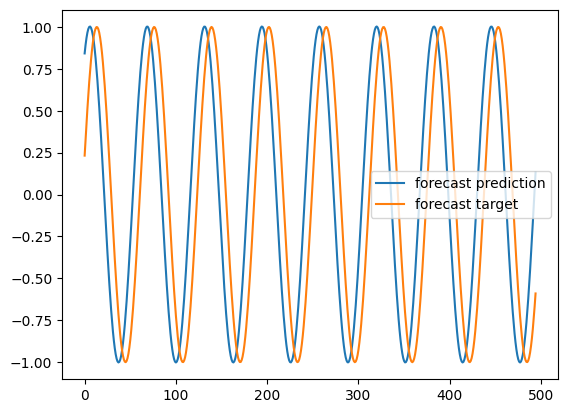

In [11]:
plt.plot(validation_predictions, label = 'forecast prediction')
plt.plot(validation_target, label ='forecast target')
plt.legend()

In [13]:
# forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input = last_x.view(1, -1)
  p =model(input_)

  # update the prediction list
  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))


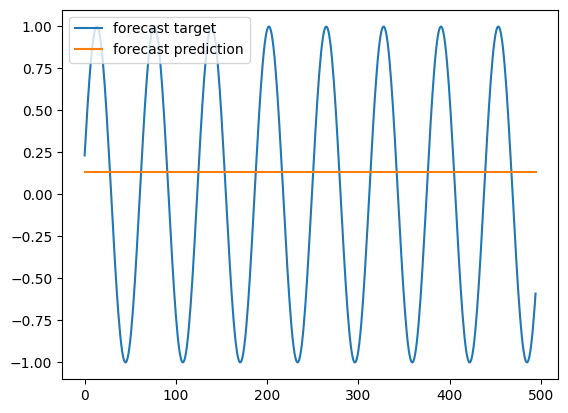

In [14]:
plt.plot(validation_target, label ='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()